In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd

import networkx as nx
#from model_analysis import model2graph
#import get_toy_model

import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from discrepancies import datasets, pool, model2graph

X_train, X_test, y_train, y_test, scaler = datasets.get_dataset()

In [5]:
pool1 = pool.BasicPool()
pool1.fit(X_train, y_train)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/sklearn/utils/validation.py:72:

In [165]:
p2g = model2graph.pool2graph(X_train, y_train, pool1)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
p2g.fit()


 ### Processing model: SVMrbf ### 

 Number of edges for G: 1110
 Mean distance between nodes: 2.33 +/- 0.77

 ### EPOCH #1 ### 

 New label distribution: [258 337]
 Number of edges for G: 1705
 Mean distance between nodes: 1.55 +/- 0.34

 ### EPOCH #2 ### 

 New label distribution: [536 519]
 Number of edges for G: 2760
 Mean distance between nodes: 0.79 +/- 0.16
 Mean node distance : 0.79
 Std node distance : 0.16
 Mean node distance - Change in % : 66.09
 Std node distance - Change in % : 79.22

 ### EPOCH #3 ### 

 New label distribution: [590 516]
 Number of edges for G: 3866
 Mean distance between nodes: 0.4 +/- 0.08
 Mean node distance : 0.4
 Std node distance : 0.08
 Mean node distance - Change in % : 49.370000000000005
 Std node distance - Change in % : 50.0

 ### EPOCH #4 ### 

 New label distribution: [566 543]
 Number of edges for G: 4975
 Mean distance between nodes: 0.2 +/- 0.04
 Mean node distance : 0.2
 Std node distance : 0.04
 Mean node distance - Change in % : 50.0


In [167]:
a = p2g.Gs['RF']

In [ ]:
# 1. Get all nodes generated from the training set

# 2. For every pair of nodes generated from the training set

## 2.1 For every models in the pool

## 2.2 Get all the touchpoints between the pair of nodes

## 2.3 Create an edge between the pair of nodes with the touchpoints

## -> touchpoints should be nodes (hences splitting the edge) or attributes to the edge ? 

## 2.4 Add the new edge and the touchpoints to the pool's graph (one edge per (model, pair of nodes))

In [218]:
from itertools import product

# 1. Get all nodes generated from the training set

Xtrain_pairs = [(n1,n2) for n1,n2 in product(a.Xtrain_nodes, a.Xtrain_nodes) if (n1 != n2)]

In [235]:
Xtrain_pair_touchpoints_features = np.empty(shape=(0,X_train.shape[1]))
Xtrain_pairs_features = np.empty(shape=(0,X_train.shape[1]))

for n1,n2 in Xtrain_pairs[:2]:

    _Xtrain_pair_touchpoints = [x for x,y in a.G.nodes(data=True) if y['Xtrain_origin']==[n1,n2] and y['touchpoint']==True]

    if len(_Xtrain_pair_touchpoints):
        continue

    tmp = np.array([a.G.nodes[n]['features'] for n in _Xtrain_pair_touchpoints])
    Xtrain_pair_touchpoints_features = np.concatenate((Xtrain_pair_touchpoints_features, tmp), axis=0)

    tmp = [a.G.nodes[n]['features'] for n in [n1,n2]]
    Xtrain_pairs_features = np.concatenate((Xtrain_pairs_features, tmp), axis=0)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [237]:
_Xtrain_pair_touchpoints

[]

In [234]:
Xtrain_pair_touchpoints

array([], dtype=float64)

<AxesSubplot:xlabel='0', ylabel='1'>

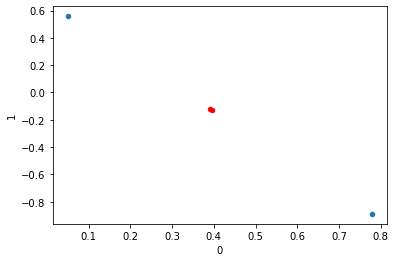

In [203]:

tmp = [a.G.nodes[n]['features'] for n in [n1,n2]]
tmp = pd.DataFrame(tmp)

tmp1 = [a.G.nodes[n]['features'] for n in Xtrain_pair_touchpoints]
tmp1 = pd.DataFrame(tmp1)

ax = plt.subplot()
tmp.plot(x=0, y=1, kind='scatter', ax=ax)
tmp1.plot(x=0, y=1, kind='scatter', ax=ax, c='r')

In [204]:
# 1. Get all nodes generated from the training set

# 2. For every pair of nodes generated from the training set

## 2.1 For every models in the pool

## 2.2 Get all the touchpoints between the pair of nodes

## 2.3 Create an edge between the pair of nodes with the touchpoints

## -> touchpoints should be nodes (hences splitting the edge) or attributes to the edge ? 

## 2.4 Add the new edge and the touchpoints to the pool's graph (one edge per (model, pair of nodes))

In [9]:
a = p2g.Gs['SVMrbf']

In [126]:
tmp = [[a.G.nodes[u]['features'], a.G.nodes[v]['features']] for u,v,d in a.G.edges(data=True) if a.G.nodes[u]['pred'] != a.G.nodes[v]['pred']]
#tmp = np.array(tmp).reshape(-1,2)

In [149]:
tmp = [(u,v) for u,v in a.G.edges if (a.G.nodes[u]['x1_origin']==None and a.G.nodes[u]['x2_origin']==None and a.G.nodes[v]['x1_origin']==None and a.G.nodes[v]['x2_origin']==None)]

In [150]:
tmp

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [103]:
m2g = model2graph.model2graph(X_train, y_train, clf)
m2g.fit(early_stopping=True, max_epoch=30)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
 Number of edges for G: 1092
 Mean distance between nodes: 2.13 +/- 0.9

 ### EPOCH #1 ### 

 New label distribution: [249 253]
 Number of edges for G: 1594
 Mean distance between nodes: 1.46 +/- 0.4

 ### EPOCH #2 ### 

 New label distribution: [485 453]
 Number of edges for G: 2532
 Mean distance between nodes: 0.78 +/- 0.17
 Mean node distance : 0.78
 Std node distance : 0.17
 Mean node distance - Change in % : 63.38
 Std node distance - Change in % : 81.11

 ### EPOCH #3 ### 

 New label distribution: [486 578]
 Number of edges for G: 3596
 Mean distance between nodes: 0.4 +/- 0.08
 Mean node distance : 0.4
 Std no

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2184


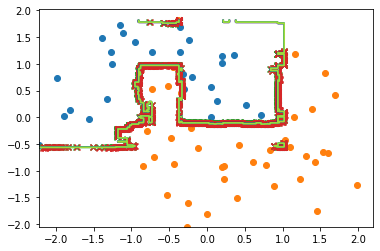

In [104]:
m2g.plot_db()
m2g.plot_m2g()

In [152]:
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = X[:,1].min()
y_max = X[:,1].max()
x_step = y_step = 0.005

x = np.arange(x_min, x_max, x_step)
y = np.arange(y_min, y_max, y_step)
xx, yy = np.meshgrid(x, y)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

In [198]:
m2g = model2graph(X, Y, clf)

for _ in range(10):
    m2g.refine_graph()

INFO:root: Initial number of edges for G: 10000
INFO:root: Mean distance between nodes: 1.59 +/- 0.76
INFO:root: ### EPOCH #1 ### 
INFO:root: New label distribution: [1229 1526]
INFO:root: Initial number of edges for G: 12755
INFO:root: Mean distance between nodes: 1.23 +/- 0.41
INFO:root: ### EPOCH #2 ### 
INFO:root: New label distribution: [3753 3674]
INFO:root: Initial number of edges for G: 20182
INFO:root: Mean distance between nodes: 0.7 +/- 0.17
INFO:root: ### EPOCH #3 ### 
INFO:root: New label distribution: [4814 4636]
INFO:root: Initial number of edges for G: 29632
INFO:root: Mean distance between nodes: 0.36 +/- 0.08
INFO:root: ### EPOCH #4 ### 
INFO:root: New label distribution: [4998 4861]
INFO:root: Initial number of edges for G: 39491
INFO:root: Mean distance between nodes: 0.18 +/- 0.04
INFO:root: ### EPOCH #5 ### 
INFO:root: New label distribution: [5142 4819]
INFO:root: Initial number of edges for G: 49452
INFO:root: Mean distance between nodes: 0.09 +/- 0.02
INFO:root

In [154]:
m2g_2 = model2graph(X, Y, clf2)

for _ in range(10):
    m2g_2.refine_graph()

INFO:root: Initial number of edges for G: 9996
INFO:root: Mean distance between nodes: 1.68 +/- 0.72
INFO:root: ### EPOCH #1 ### 
INFO:root: New label distribution: [1453 1653]
INFO:root: Initial number of edges for G: 13102
INFO:root: Mean distance between nodes: 1.29 +/- 0.38
INFO:root: ### EPOCH #2 ### 
INFO:root: New label distribution: [3780 4206]
INFO:root: Initial number of edges for G: 21088
INFO:root: Mean distance between nodes: 0.72 +/- 0.15
INFO:root: ### EPOCH #3 ### 
INFO:root: New label distribution: [5355 4387]
INFO:root: Initial number of edges for G: 30830
INFO:root: Mean distance between nodes: 0.36 +/- 0.07
INFO:root: ### EPOCH #4 ### 
INFO:root: New label distribution: [5393 4572]
INFO:root: Initial number of edges for G: 40795
INFO:root: Mean distance between nodes: 0.18 +/- 0.04
INFO:root: ### EPOCH #5 ### 
INFO:root: New label distribution: [5003 4985]
INFO:root: Initial number of edges for G: 50783
INFO:root: Mean distance between nodes: 0.09 +/- 0.02
INFO:root

In [164]:
import hvplot.pandas

def plot_db(m2g, clf):

    tmp = [[m2g.G.nodes[u]['features'], m2g.G.nodes[v]['features']] for u,v,d in m2g.G.edges(data=True) if m2g.G.nodes[u]['pred'] != m2g.G.nodes[v]['pred']]
    tmp = np.array(tmp).reshape(-1,2)

    preds = clf.predict(tmp).reshape(-1,1)
    tmp = np.concatenate((tmp, preds), axis=1)
    df = pd.DataFrame(tmp, columns=['x1', 'x2', 'preds'])

    return df
    

In [165]:
df = plot_db(m2g, clf)
df.hvplot.scatter(x='x1', y='x2', c='preds')

:Scatter   [x1]   (x2,preds)

In [166]:
df = plot_db(m2g_2, clf2)
df.hvplot.scatter(x='x1', y='x2', c='preds')

:Scatter   [x1]   (x2,preds)

20000


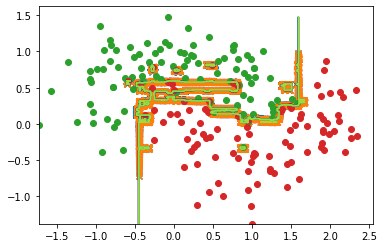

In [168]:
m2g.plot_db()

19992


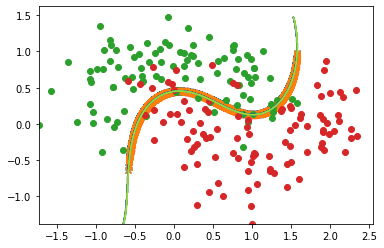

In [167]:
m2g_2.plot_db()

In [300]:
def detect_decision_boundary(spath_preds):
    mask = [True]
    for i in range(1,len(spath_preds)-1):
        if (spath_preds[i-1]==spath_preds[i]) and (spath_preds[i]==spath_preds[i+1]):
            mask.append(False)
        else:
            mask.append(True)
    mask.append(True)

    return mask

In [324]:
db = np.array([]).reshape(0,2)

for p in m2g.pairs[:100]:

    spath = nx.shortest_path(m2g.G, source=p[0], target=p[1], weight='distance')

    spath_features = [m2g.G.nodes[id]['features'] for id in spath]
    spath_features = np.array(spath_features)

    spath_preds = [m2g.G.nodes[id]['pred'] for id in spath]
    spath_preds = np.array(spath_preds)

    mask = detect_decision_boundary(spath_preds)
    spath_features = spath_features[mask][1:-1]    

    db = np.concatenate((db,spath_features))

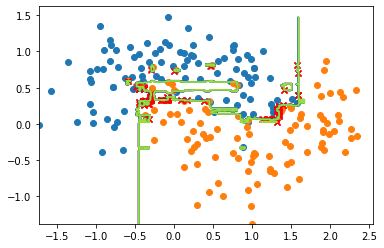

In [327]:
m2g.plot_db()

plt.scatter(db[:,0], db[:,1], c='r', marker='x')

In [328]:
len(m2g.pairs)

10000